In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import cufflinks as cf
import plotly.express as px


In [2]:
cf.go_offline()

In [3]:
diamonds_df = pd.read_csv('./data/diamonds_train.csv')
diamonds_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.21,Premium,J,VS2,62.4,58.0,4268,6.83,6.79,4.25
1,0.32,Very Good,H,VS2,63.0,57.0,505,4.35,4.38,2.75
2,0.71,Fair,G,VS1,65.5,55.0,2686,5.62,5.53,3.65
3,0.41,Good,D,SI1,63.8,56.0,738,4.68,4.72,3.00
4,1.02,Ideal,G,SI1,60.5,59.0,4882,6.55,6.51,3.95


In [4]:
diamonds_df.shape


(40455, 10)

In [5]:
diamonds_df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [13]:
diamonds_df.max()

carat            4.5
cut        Very Good
color              J
clarity         VVS2
depth             79
table             95
price          18823
x              10.23
y               58.9
z               8.06
dtype: object

In [20]:
diamonds_df.mode()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.3,Ideal,G,SI1,61.9,56.0,605,4.37,4.37,2.69


In [16]:
#getting sumary statistics

#cathegorical values

diamonds_df.describe(include='object')

,cut,color,clarity
count,40455,40455,40455
unique,5,7,8
top,Ideal,G,SI1
freq,16220,8455,9749


In [14]:
#numerical values

diamonds_df.describe(include=['float64','int64'])

,carat,depth,table,price,x,y,z
count,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000
mean,0.797706,61.752841,57.446133,3928.444469,5.729392,5.732819,3.537154
std,0.475544,1.431725,2.233535,3992.416147,1.124453,1.146650,0.697062
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,945.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2397.000000,5.690000,5.710000,3.520000
75%,1.040000,62.500000,59.000000,5331.000000,6.540000,6.540000,4.035000
max,4.500000,79.000000,95.000000,18823.000000,10.230000,58.900000,8.060000


In [17]:
diamonds_df['clarity'].value_counts()

SI1     9749
VS2     9248
SI2     6929
VS1     6066
VVS2    3799
VVS1    2774
IF      1327
I1       563
Name: clarity, dtype: int64

In [18]:
diamonds_df['color'].value_counts()

G    8455
E    7325
F    7177
H    6277
D    5049
I    4032
J    2140
Name: color, dtype: int64

In [19]:
diamonds_df['cut'].value_counts()

Ideal        16220
Premium      10260
Very Good     9095
Good          3663
Fair          1217
Name: cut, dtype: int64

In [14]:
print('cut on df:', diamonds_df['cut'].unique())
print('color on df:', diamonds_df['color'].unique())

cut on df: ['Premium' 'Very Good' 'Fair' 'Good' 'Ideal']
color on df: ['J' 'H' 'G' 'D' 'F' 'E' 'I']


In [17]:
print('max value on this dataset;', diamonds_df.price.max())
print('min value on this dataset;', diamonds_df.price.min())
print('avg values on this dataset;', diamonds_df.price.mean())
print('std on this dataset;', diamonds_df.price.std())
print('median on this dataset;', diamonds_df.price.median())

max value on this dataset; 18823
min value on this dataset; 326
avg values on this dataset; 3928.444469163268
std on this dataset; 3992.4161466170863
median on this dataset; 2397.0


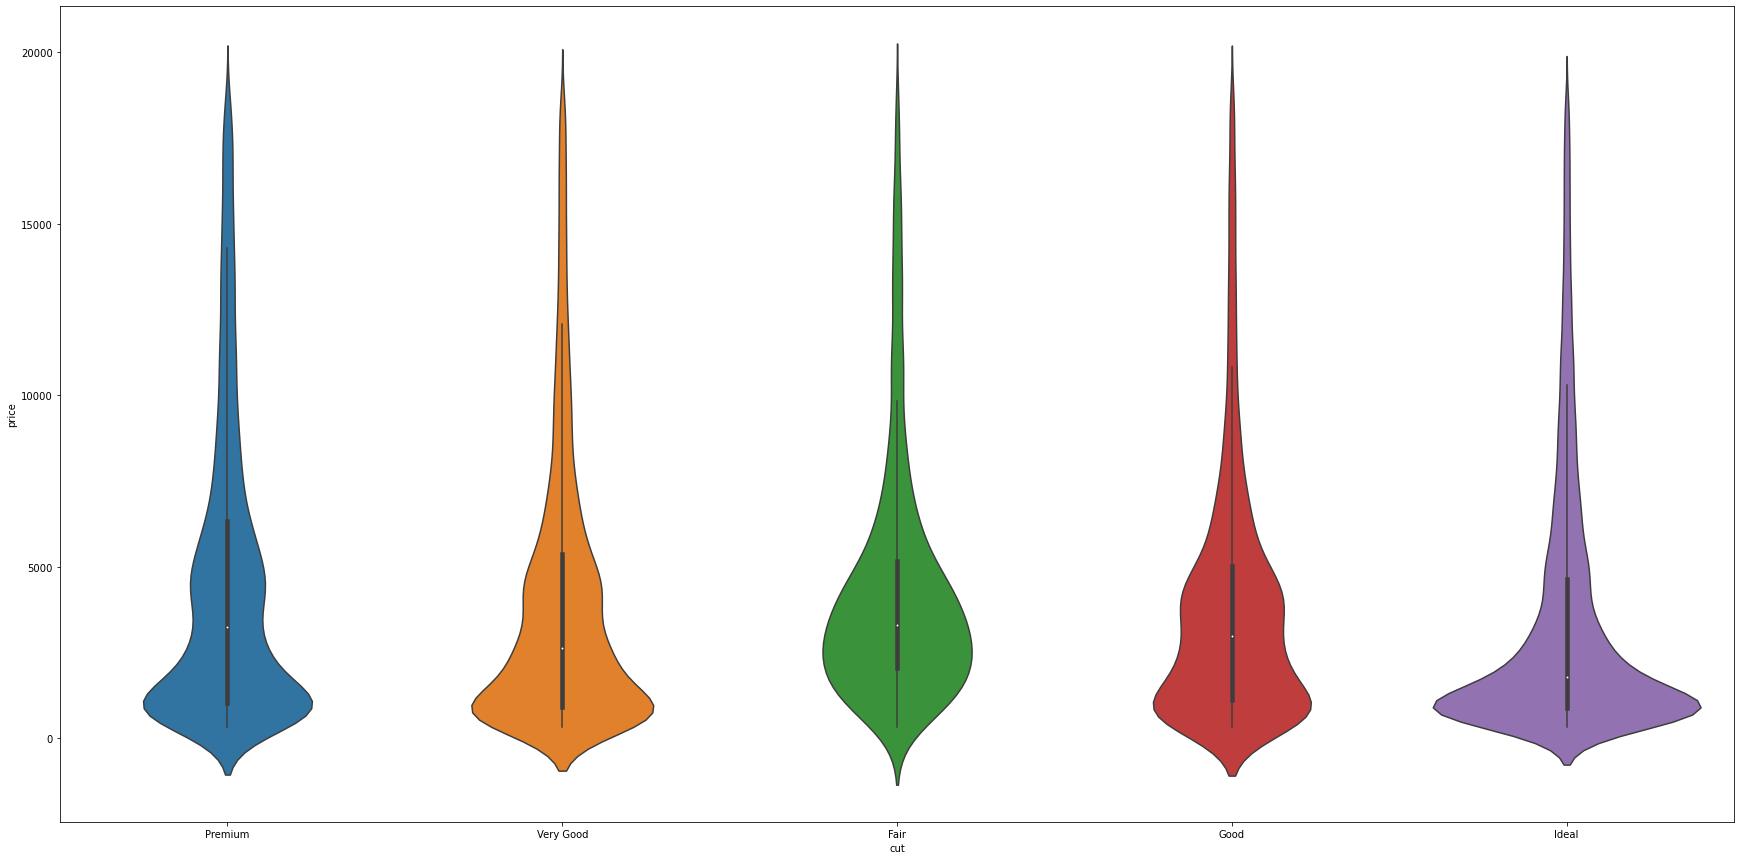

In [8]:
fig = plt.figure(figsize=(30,15))
ax = sns.violinplot(x='cut', y='price', data=diamonds_df)

In [30]:
price_by_color = diamonds_df.groupby('color', as_index=False).agg('mean')
price_by_color

,color,carat,depth,table,price,x,y,z
0,D,0.653036,61.721886,57.344959,3134.943157,5.404704,5.409541,3.336782
1,E,0.658835,61.659836,57.494567,3088.342526,5.413894,5.418651,3.338709
2,F,0.731503,61.689954,57.409726,3677.355720,5.601393,5.607254,3.455930
3,G,0.774382,61.752785,57.287889,4023.214902,5.684102,5.687183,3.508856
4,H,0.910355,61.827481,57.533503,4476.469014,5.981431,5.984082,3.693629
5,I,1.026791,61.873214,57.562574,5090.868800,6.216099,6.215675,3.842078
6,J,1.166500,61.909626,57.790701,5346.234112,6.527285,6.525570,4.039879


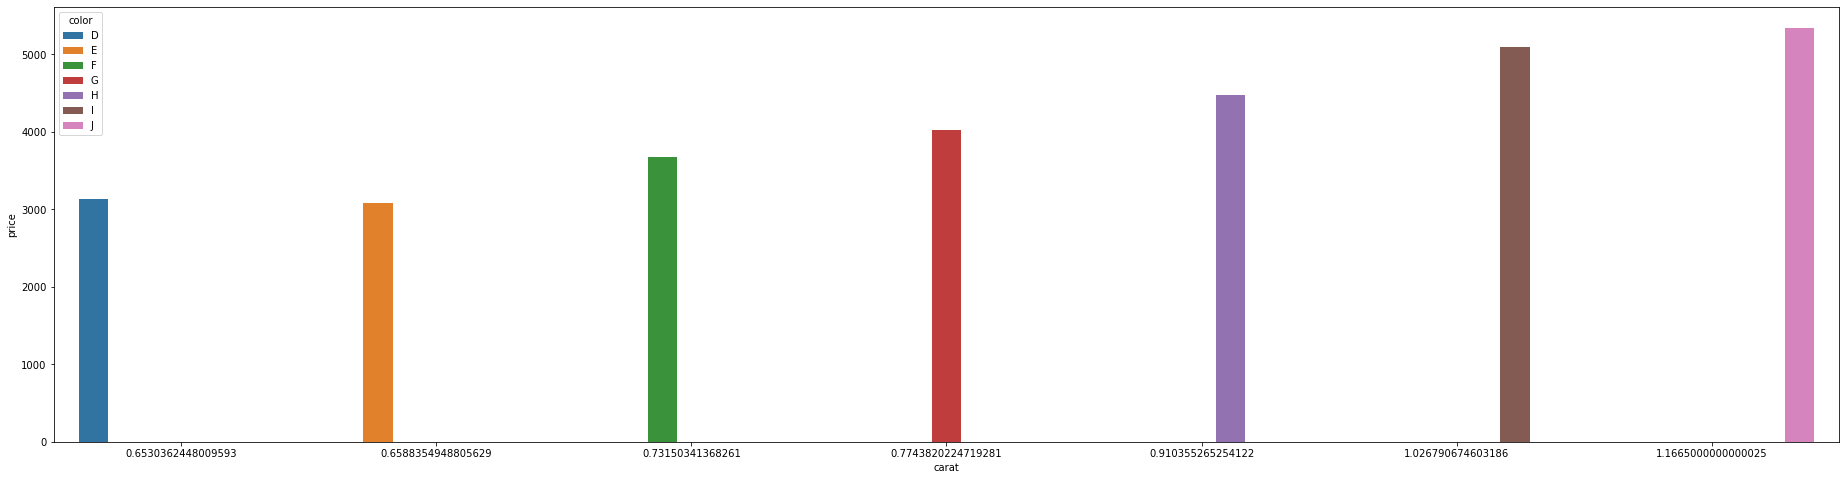

In [33]:
fig = plt.figure(figsize=(32,8))
ax = sns.barplot(x='carat', y='price',hue='color',data=price_by_color)